In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import random as rand
from scipy import constants as const
from matplotlib import cm
import time as time
%matplotlib notebook

n = 5000
t = 500
h = 1
k_B = const.Boltzmann
temp = 310
beta = 1/(k_B*temp)
k = 1/beta
binv = 1/beta
L = 50
V0_Na = binv*50
V0_K  = binv*50
elem_C = const.elementary_charge
Cc = 0.07

def p_stepright(x, V):
    rpot = np.zeros(x.shape)
    lpot = np.zeros(x.shape)
    for it, elem in enumerate(x):
        rpot[it] = V(elem + h)
        lpot[it] = V(elem - h)
    return 1/(1+np.exp(-beta*(lpot-rpot)))

def steps(x, V):
    ran = rand.rand(len(x))
    return np.where(ran < p_stepright(x, V),1, -1)*h

def rwalk_pot(x0, n_particles, t_steps, h, V):
    pos = x0
    poses = np.zeros([t_steps, n_particles])
    for t in range(t_steps):
        poses[t] = pos
        new_steps = steps(pos, V)
        pos += new_steps
    return poses

def V_elec(x, V_val):
    if x < -h:
        return V_val*elem_C
    elif x > h:
        return 0
    else:
        return (1-(x+h)/2) * V_val * elem_C

def Vmem_N(x, V_val):
    if abs(x) > L / 2:
        return np.inf
    if -h <= x <= h:
        return V_val
    else:
        return 0
    
def Vmem_K(x, V_val):
    if abs(x) > L / 2:
        return np.inf
    elif -h <= x <= h:
        return V_val
    else:
        return 0

def NaK_pot(): #NB! Edita
    mult = 1
    # start parameters: T = #steps
    plot_ts = [5, 50, 150, 1000]
    # N partiklar i starttilstand
    Na_outside, Na_inside = 1450*mult, 50*mult
    N_Na = Na_outside + Na_inside
    Na = np.array([L/4 for _ in range(Na_outside)] \
                + [-L/4 for _ in range(Na_inside)])

    K_outside, K_inside = 50*mult, 1400*mult
    N_K = K_outside + K_inside
    K  = np.array([L/4 for _ in range(K_outside)] \
                + [-L/4 for _ in range(K_inside)])

    phi_K, phi_Na = dict(),  dict()

    Vs = np.zeros(t + 1)
    
    #def V_K(x):  return V_elec(x, voltage) + Vmem_K(x, V0_K)
    #def V_Na(x): return V_elec(x, voltage) + Vmem_N(x, binv)    
    
    for t_it in range(t + 1):
        # count the particles inside
        count_K  = len(K[np.where(K < -h)])
        count_Na = len(Na[np.where(Na < -h)])
        #convert to Moles
        charge_conc = (count_K + count_Na) * 0.1 / mult # mM
        charge_delta = (charge_conc - 150)
        
        voltage = 1e-3 * charge_delta / Cc
        Vs[t_it] = voltage
        
        #Bytt heller ut variabel som blir sendt inn.
        
        if voltage > -70e-3:
            V0_K  = binv * 50
            V0_Na = binv
        elif voltage < 30e-3:
            V0_K  = binv
            V0_Na = binv * 50
        
        def V_K(x):  return V_elec(x, voltage) + Vmem_K(x, V0_K)
        def V_Na(x): return V_elec(x, voltage) + Vmem_N(x, V0_Na)
        
        K  += steps(K, V_K)
        Na += steps(Na, V_Na)
        
        if t_it in plot_ts:
            phi_K[t_it]  = np.copy(K)
            phi_Na[t_it] = np.copy(Na)
    return Vs

def get_average_potential(n_samples):
    Vis = np.zeros((10,t+1))
    for i in range(10):
        Vis[i,:],_,_ = NaK_pot()
        
    return np.mean(Vis, axis=0)

def plot_V_elec():
    xs = np.linspace(-3*h,3*h,1000)
    epotfig = plt.figure()
    vs = np.zeros(len(xs))
    for i in range(len(xs)):
        vs[i] = V_elec(xs[i], -70e-3) + Vmem_N(xs[i], V0_Na)
    plt.plot(xs, vs)
    plt.show()

def avg_subslice(A, n):
    D = (len(A)//n)*n
    return np.mean(A[:D].reshape(-1, n), axis=1)


<IPython.core.display.Javascript object>


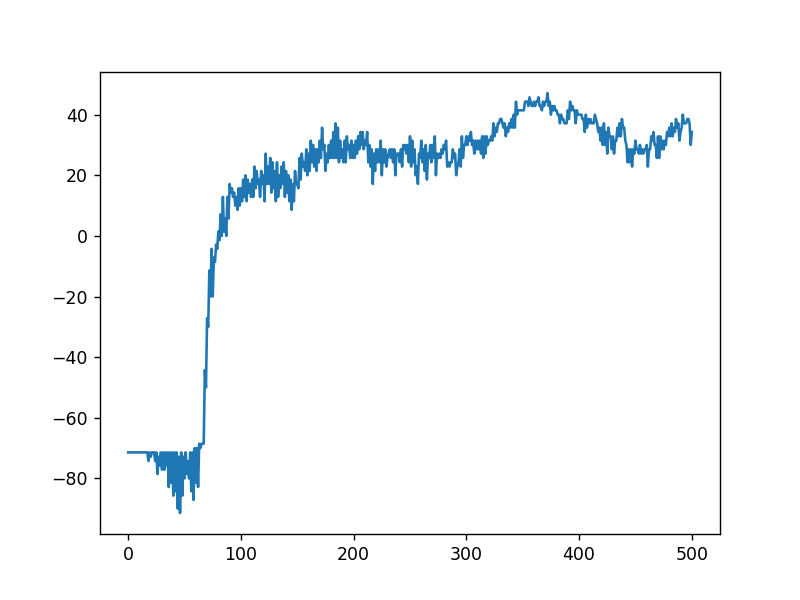

In [3]:
Vs = NaK_pot()
plt.plot(np.arange(len(Vs)),Vs*1e3)
plt.show()

<IPython.core.display.Javascript object>


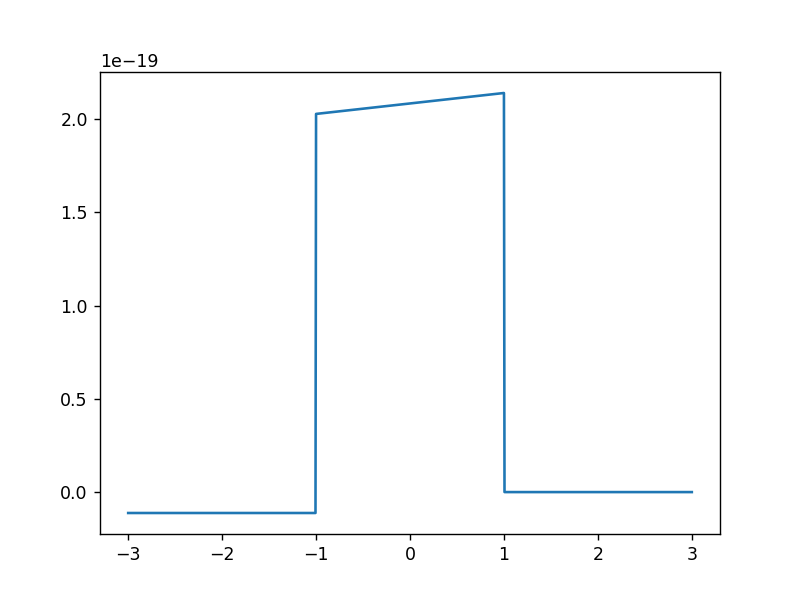

In [4]:
plot_V_elec()

<IPython.core.display.Javascript object>


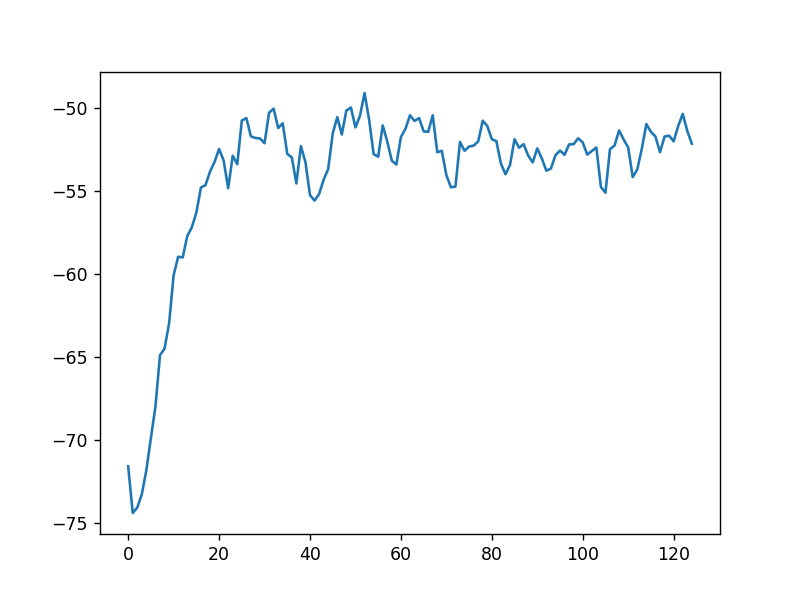

In [89]:
a = avg_subslice(Vs, 20)
plt.figure()
plt.plot(a*1e3)
plt.show()

<IPython.core.display.Javascript object>


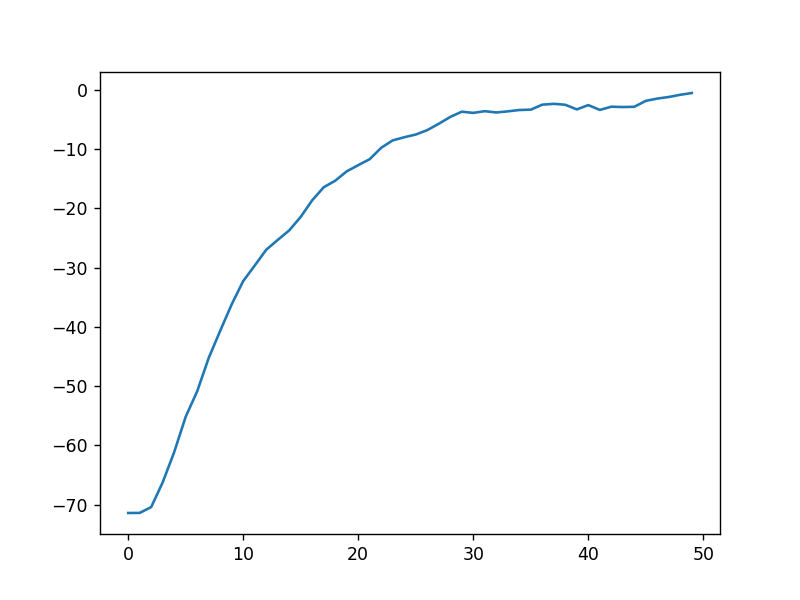

In [62]:
aa = avg_subslice(av_Vis, 10)

thisfig = plt.figure()
plt.plot(aa*1e3)
plt.show()